# EE-411, HomeWork 2 : Classifying digits & learning theory
### Yassin Alnuaimee 326279  EL-MA1

In [51]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler

digits=load_digits()

##  Classifying digits with Scikit-learn

## 1) Import and prepare the data

In [52]:
X,y=load_digits(return_X_y=True)

In [53]:
print(y)
y=np.where(y%2==0, 0, 1)
print(y)

[0 1 2 ... 8 9 8]
[0 1 0 ... 0 1 0]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#statify to ensure that the proportion of 0s and 1s in both the training and testing sets are similar to the proportion in the original dataset

In [55]:
# Calculate proportions in the training set
proportion_0_train = np.sum(y_train == 0) / len(y_train)
proportion_1_train = np.sum(y_train == 1) / len(y_train)

# Calculate proportions in the testing set
proportion_0_test = np.sum(y_test == 0) / len(y_test)
proportion_1_test = np.sum(y_test == 1) / len(y_test)

# Print the proportions
print(f"Training set - Proportion of 0s: {proportion_0_train}, Proportion of 1s: {proportion_1_train}")
print(f"Testing set - Proportion of 0s: {proportion_0_test}, Proportion of 1s: {proportion_1_test}")


Training set - Proportion of 0s: 0.49562450278440734, Proportion of 1s: 0.5043754972155927
Testing set - Proportion of 0s: 0.4962962962962963, Proportion of 1s: 0.5037037037037037


## 2)Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
log_reg_l2 = LogisticRegression(penalty='l2')
log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_test)

# Evaluate accuracy
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f"Logistic Regression with L2 penalty Accuracy: {accuracy_l2}")


Logistic Regression with L2 penalty Accuracy: 0.9203703703703704


c:\Users\Yass La Menace\anaconda3\envs\Coding\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')  # 'liblinear' works well with L1
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)

# Evaluate accuracy
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"Logistic Regression with L1 penalty Accuracy: {accuracy_l1}")


Logistic Regression with L1 penalty Accuracy: 0.9185185185185185


In [59]:
def neg_rss(reg, X, y):
    yp = reg.predict(X)
    return -np.mean(np.power(y - yp,2))

We observe that the logistic regression with l2 penalty give a better score than the logistic regression with l1 penalty

In [60]:
import matplotlib.pyplot as plt

The accuracy of the Logistic Regression with l2 loss and optimal parameter C is 0.9185185185185185
The optimal parameter C is 0.005738441648302393, thus the optimal lambda is 174.26333860096506


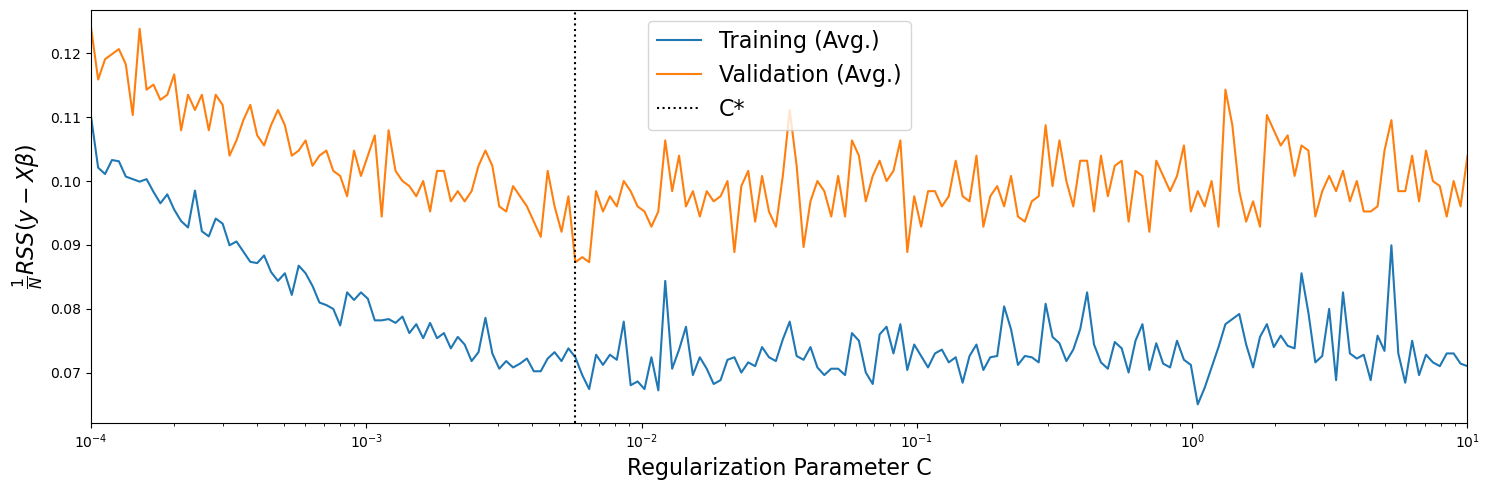

In [61]:
cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

log_reg_l2= LogisticRegression(C=1e-3, multi_class='multinomial', penalty='l2', solver='sag', tol=0.1)

param_grid = [{'C': np.logspace(-4,1,200)}]

cv_l2 = GridSearchCV(log_reg_l2, param_grid, scoring=neg_rss, cv=cv,return_train_score=True)
cv_l2.fit(X_train,y_train)

cvOptC = cv_l2.cv_results_['param_C'][cv_l2.best_index_]
testedC = cv_l2.cv_results_['param_C']
trainScores = -cv_l2.cv_results_['mean_train_score']   
testScores = -cv_l2.cv_results_['mean_test_score']  

plt.figure(figsize=(15,5))
plt.plot(testedC, trainScores, '-', label='Training (Avg.)')
plt.plot(testedC, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter C', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptC, label='C*', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([1e-4, 1e1])
plt.tight_layout()
plt.legend(loc='best', fontsize=16)

log_reg_l2_opt = LogisticRegression(C=cvOptC, multi_class='multinomial', penalty='l2', solver='sag', tol=0.1)

log_reg_l2_opt.fit(X_train,y_train)

score_l2_opt = log_reg_l2_opt.score(X_test,y_test)

print(f'The accuracy of the Logistic Regression with l2 loss and optimal parameter C is {score_l2_opt}') 
print(f'The optimal parameter C is {cvOptC}, thus the optimal lambda is {1/cvOptC}') 

The accuracy of the Logistic Regression with l1 loss and optimal parameter C is 0.9296296296296296
The optimal parameter C is 0.06517339604882427, thus the optimal lambda is 15.343684089300115


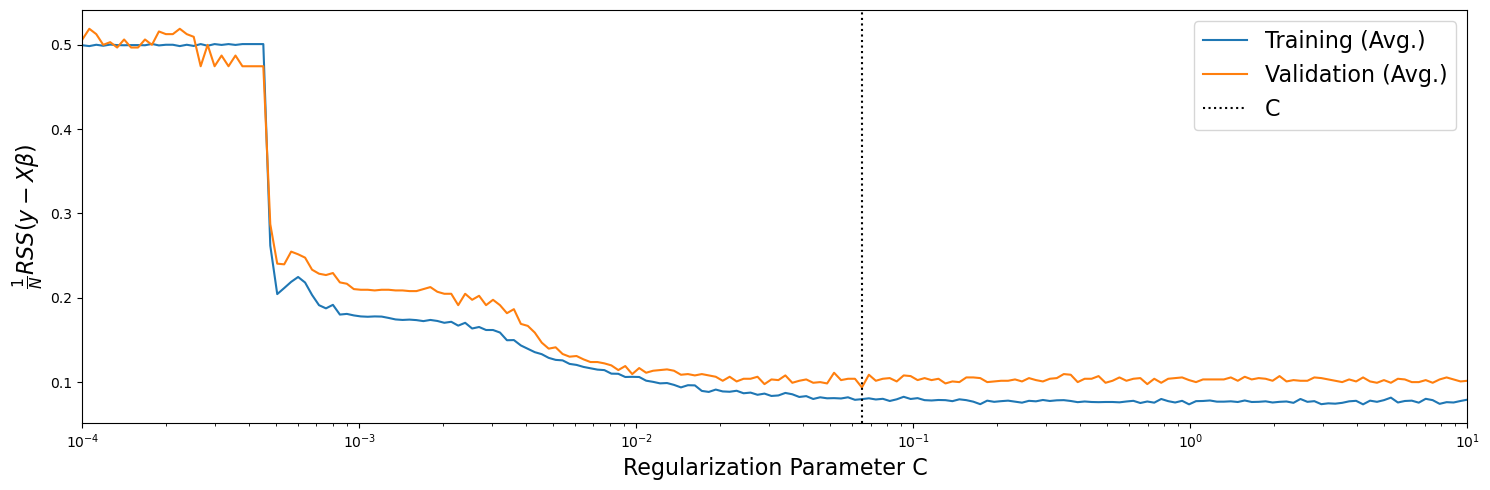

In [62]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
log_reg_l1 = LogisticRegression(C=1e-3,multi_class='auto',penalty='l1', solver='saga', tol=0.1)

param_grid = [{'C': np.logspace(-4,1,200)}]
cv_l1 = GridSearchCV(log_reg_l1, param_grid, scoring=neg_rss, cv=cv,return_train_score=True)
cv_l1.fit(X_train,y_train)

cvOptC = cv_l1.cv_results_['param_C'][cv_l1.best_index_]
testedC = cv_l1.cv_results_['param_C']
trainScores = -cv_l1.cv_results_['mean_train_score']   
testScores = -cv_l1.cv_results_['mean_test_score']    

plt.figure(figsize=(15,5))
plt.plot(testedC, trainScores, '-', label='Training (Avg.)')
plt.plot(testedC, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter C', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptC, label='C', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([1e-4, 1e1])
plt.tight_layout()
plt.legend(loc='best', fontsize=16)

log_reg_l1_opt = LogisticRegression(C=cvOptC,multi_class='auto',penalty='l1', solver='saga', tol=0.1)

log_reg_l1_opt.fit(X_train,y_train)

score_l1_opt = log_reg_l1_opt.score(X_test,y_test)

print(f'The accuracy of the Logistic Regression with l1 loss and optimal parameter C is {score_l1_opt}') 
print(f'The optimal parameter C is {cvOptC}, thus the optimal lambda is {1/cvOptC}') 

## 3)Ridge and Hinge

In [63]:
from sklearn import linear_model

In [64]:
regRR = linear_model.Ridge(alpha=0.01)

regRR.fit(X_train, y_train)
accuracy_RR = regRR.score(X_test,y_test)

print(f"Ridge regression Accuracy: {accuracy_RR}")

Ridge regression Accuracy: 0.6597838152532722


The accuracy of the Ridge Classifier with optimal alpha is 0.912962962962963
The optimal alpha is 488.02515836544336


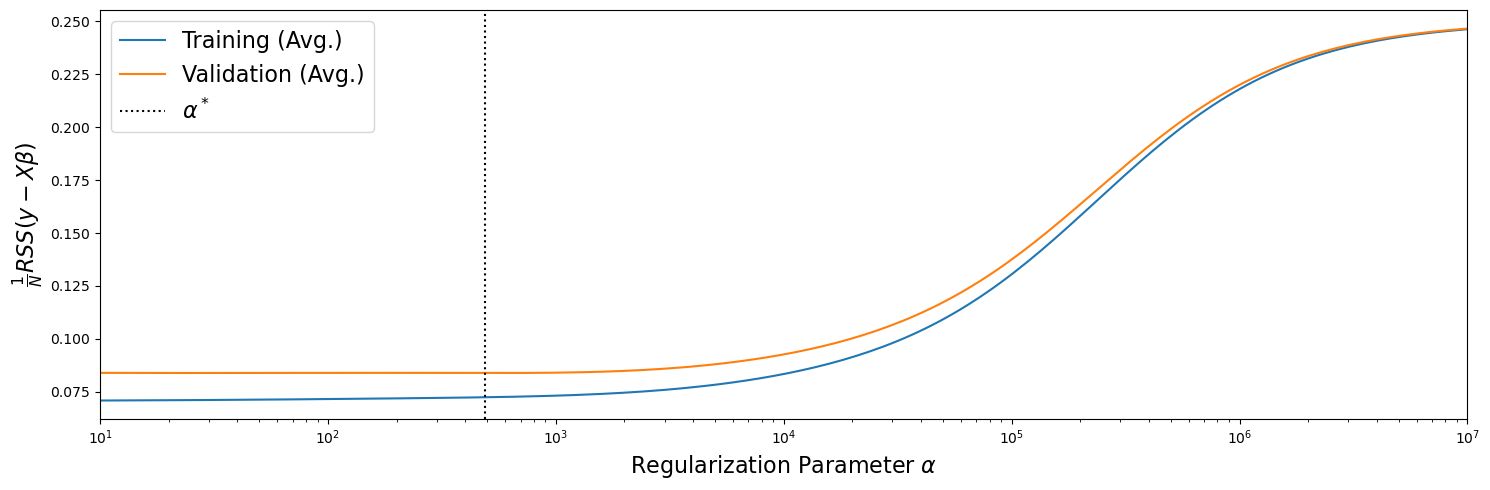

In [66]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

param_grid = [{'alpha': np.logspace(1,7,200)}]

cv_regRR = GridSearchCV(regRR, param_grid, scoring=neg_rss, cv=cv,return_train_score=True)
cv_regRR.fit(X_train,y_train)

cvOptAlpha = cv_regRR.cv_results_['param_alpha'][cv_regRR.best_index_]
testedAlpha = cv_regRR.cv_results_['param_alpha']
trainScores = -cv_regRR.cv_results_['mean_train_score'] 
testScores = -cv_regRR.cv_results_['mean_test_score']     

plt.figure(figsize=(15,5))
plt.plot(testedAlpha, trainScores, '-', label='Training (Avg.)')
plt.plot(testedAlpha, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter $\\alpha$', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptAlpha, label='$\\alpha^*$', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([10, 1e7])
plt.tight_layout()
plt.legend(loc=2, fontsize=16)

log_regRR_opt = linear_model.RidgeClassifier(alpha=cvOptAlpha)

log_regRR_opt.fit(X_train,y_train)
score_regRR_opt = log_regRR_opt.score(X_test,y_test)
print(f'The accuracy of the Ridge Classifier with optimal alpha is {score_regRR_opt}') 
print(f'The optimal alpha is {cvOptAlpha}')

In [67]:
from sklearn import svm

In [73]:
regSVC_fixed = svm.LinearSVC(C=0.001,max_iter=1000000)
regSVC_fixed.fit(X_train,y_train)
score_regSVC_fixed = regSVC_fixed.score(X_test,y_test)
print(f'The accuracy of the Hinge Classifier is {score_regSVC_fixed}')

The accuracy of the Hinge Classifier is 0.9222222222222223


The accuracy of the Hinge Classifier and optimal parameter C is 0.9222222222222223
The optimal parameter C is 0.0020235896477251557, thus the optimal lambda is 494.1713361323838


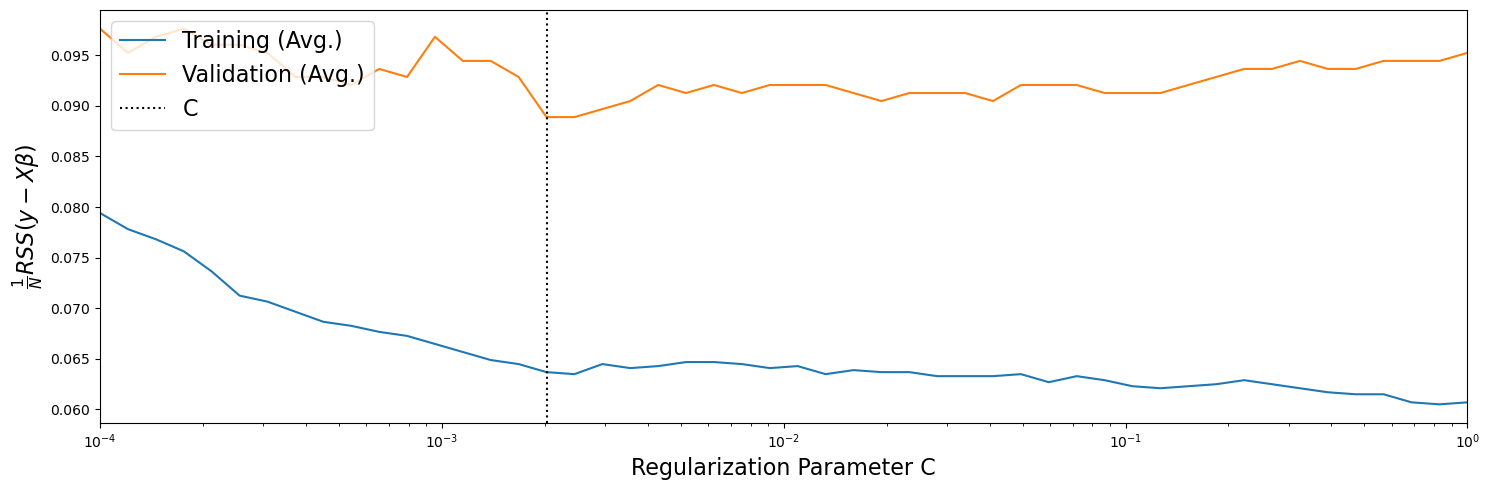

In [75]:
regSVC = svm.LinearSVC(C=0.001,max_iter=10000000,tol=0.001)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

param_grid = [{'C': np.logspace(-4,0,50)}]

cv_regSVC = GridSearchCV(regSVC, param_grid, scoring=neg_rss, cv=cv,return_train_score=True)
cv_regSVC.fit(X_train,y_train)
cvOptC = cv_regSVC.cv_results_['param_C'][cv_regSVC.best_index_]

testedC = cv_regSVC.cv_results_['param_C']
trainScores = -cv_regSVC.cv_results_['mean_train_score']
testScores = -cv_regSVC.cv_results_['mean_test_score']

plt.figure(figsize=(15,5))
plt.plot(testedC, trainScores, '-', label='Training (Avg.)')
plt.plot(testedC, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter C', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptC, label='C', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([1e-4, 1])
plt.tight_layout()
plt.legend(loc=2, fontsize=16)

log_regSVC_opt = svm.LinearSVC(C=cvOptC)

log_regSVC_opt.fit(X_train,y_train)
score_regSVC_opt = log_regSVC_opt.score(X_test,y_test)
print(f'The accuracy of the Hinge Classifier and optimal parameter C is {score_regSVC_opt}') 
print(f'The optimal parameter C is {cvOptC}, thus the optimal lambda is {1/cvOptC}') 

## 4) Random forest

In [89]:
from sklearn import ensemble

In [90]:
# Create estimator object
reg_rf = ensemble.RandomForestRegressor(n_estimators=10)

# Fit estimator to training data
reg_rf.fit(X_train, y_train)
score_rf=reg_rf.score(X_test, y_test)

print(f'The accuracy of the random forest is {score_rf}') 

The accuracy of the random forest is 0.8961424495171203


In [91]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


param_grid = [{'n_estimators': np.logspace(1, 4, 20,dtype=int)}]

In [92]:
cv_rf = GridSearchCV(reg_rf, param_grid, scoring = neg_rss, cv=cv,return_train_score=True)

In [93]:
cv_rf.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(n_estimators=10),
             param_grid=[{'n_estimators': array([   10,    14,    20,    29,    42,    61,    88,   127,   183,
         263,   379,   545,   784,  1128,  1623,  2335,  3359,  4832,
        6951, 10000])}],
             return_train_score=True,
             scoring=<function neg_rss at 0x00000226EA166E80>)

The accuracy of the Hinge Classifier and optimal parameter C is 0.8961424495171203
The optimal parameter n is 183


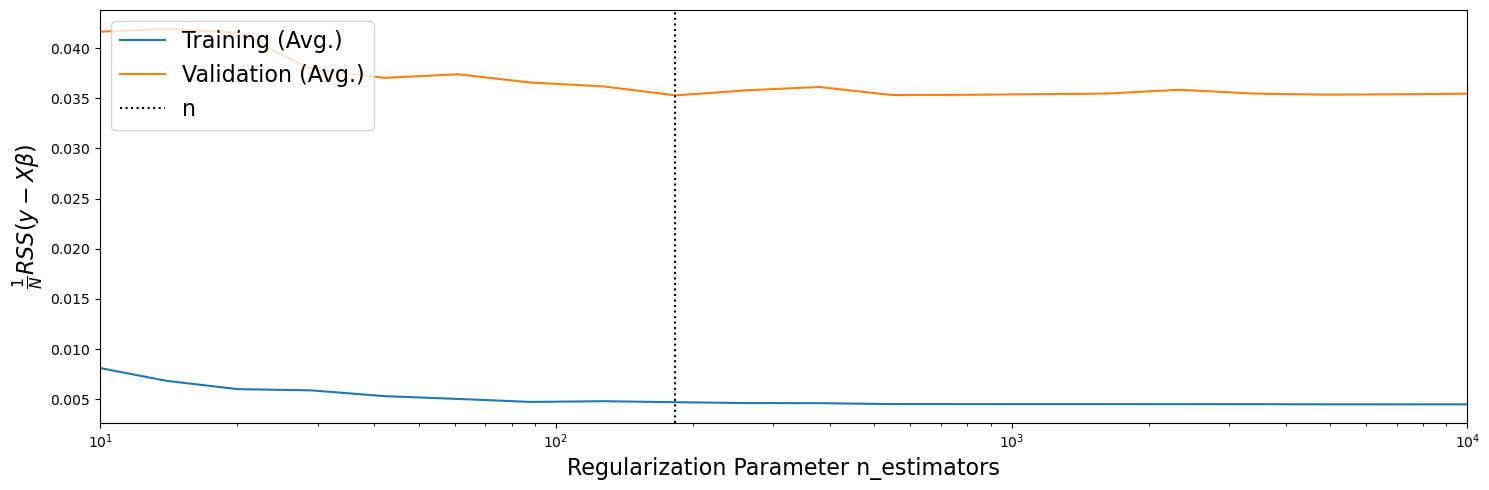

In [95]:
cvOptn = cv_rf.cv_results_['param_n_estimators'][cv_rf.best_index_]

testedn = cv_rf.cv_results_['param_n_estimators']
trainScores = -cv_rf.cv_results_['mean_train_score']
testScores = -cv_rf.cv_results_['mean_test_score']

plt.figure(figsize=(15,5))
plt.plot(testedn, trainScores, '-', label='Training (Avg.)')
plt.plot(testedn, testScores, '-', label='Validation (Avg.)')
plt.xlabel('Regularization Parameter n_estimators', fontsize=16)
plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
plt.axvline(cvOptn, label='n', color='k', linestyle=':')
plt.xscale('log')
plt.xlim([10, 1e4])
plt.tight_layout()
plt.legend(loc=2, fontsize=16)

reg_rf_opt = ensemble.RandomForestRegressor(n_estimators=cvOptn)

reg_rf_opt.fit(X_train, y_train)
score_rf_opt=reg_rf.score(X_test, y_test)

print(f'The accuracy of the Hinge Classifier and optimal parameter C is {score_rf_opt}') 
print(f'The optimal parameter n is {cvOptn}') 

### 5) Random feature

In [108]:
from numpy import random


def rand_l2(feature) :
  d = X.shape[1]
  D = feature*d
  F = random.normal(0,np.sqrt(1/d),size=(D,d))

  u_train = 1/np.sqrt(D) *1/(1+np.exp(-(X_train@np.transpose(F))))
  u_test = 1/np.sqrt(D) *1/(1+np.exp(-(X_test@np.transpose(F))))



  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

  log_reg_l2 = LogisticRegression(C=1e5,multi_class='multinomial',penalty='l2', solver='sag', tol=0.1)

  param_grid = [{'C': np.logspace(2,7,50)}]
  
  cv_l2 = GridSearchCV(log_reg_l2, param_grid, scoring=neg_rss, cv=cv,return_train_score=True)
  cv_l2.fit(u_train,y_train)

  cvOptC = cv_l2.cv_results_['param_C'][cv_l2.best_index_]
  testedC = cv_l2.cv_results_['param_C']
  trainScores = -cv_l2.cv_results_['mean_train_score']   
  testScores = -cv_l2.cv_results_['mean_test_score']    

  plt.figure(figsize=(15,5))
  plt.plot(testedC, trainScores, '-', label='Training (Avg.)')
  plt.plot(testedC, testScores, '-', label='Validation (Avg.)')
  plt.xlabel('Regularization Parameter C', fontsize=16)
  plt.ylabel('$\\frac{1}{N}RSS(y - X\\beta)$', fontsize=16)
  plt.axvline(cvOptC, label='C*', color='k', linestyle=':')
  plt.xscale('log')
  plt.xlim([1e2, 1e7])
  plt.tight_layout()
  plt.legend(loc=2, fontsize=16)


  log_reg_l2_opt = LogisticRegression(C=cvOptC,multi_class='multinomial',penalty='l2', solver='sag', tol=0.1)

  log_reg_l2_opt.fit(u_train,y_train)
  score_l2_opt = log_reg_l2_opt.score(u_test,y_test)
  
  print(f'The accuracy of the Logistic Regression with l2 loss, D = {feature}d and optimal parameter C is {score_l2_opt}') 
  print(f'The optimal parameter C is {cvOptC}, thus the optimal lambda is {1/cvOptC}') 

The accuracy of the Logistic Regression with l2 loss, D = 3d and optimal parameter C is 0.9518518518518518
The optimal parameter C is 517.9474679231213, thus the optimal lambda is 0.0019306977288832496


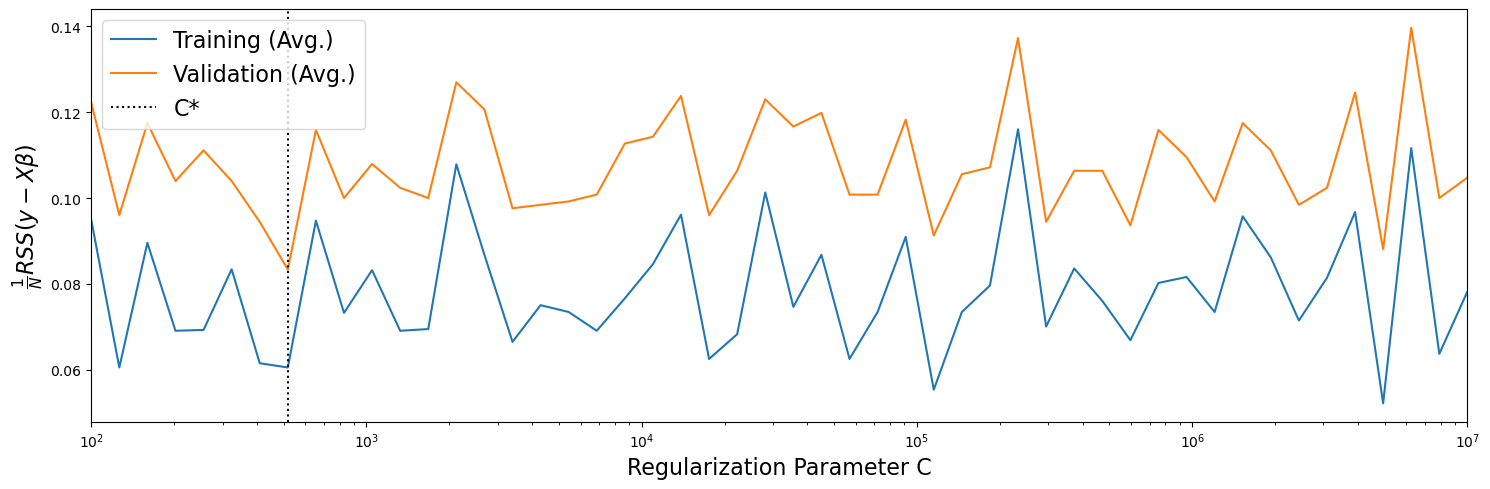

In [117]:
rand_l2(3)

The accuracy of the Logistic Regression with l2 loss, D = 6d and optimal parameter C is 0.9555555555555556
The optimal parameter C is 828.6427728546843, thus the optimal lambda is 0.0012067926406393288


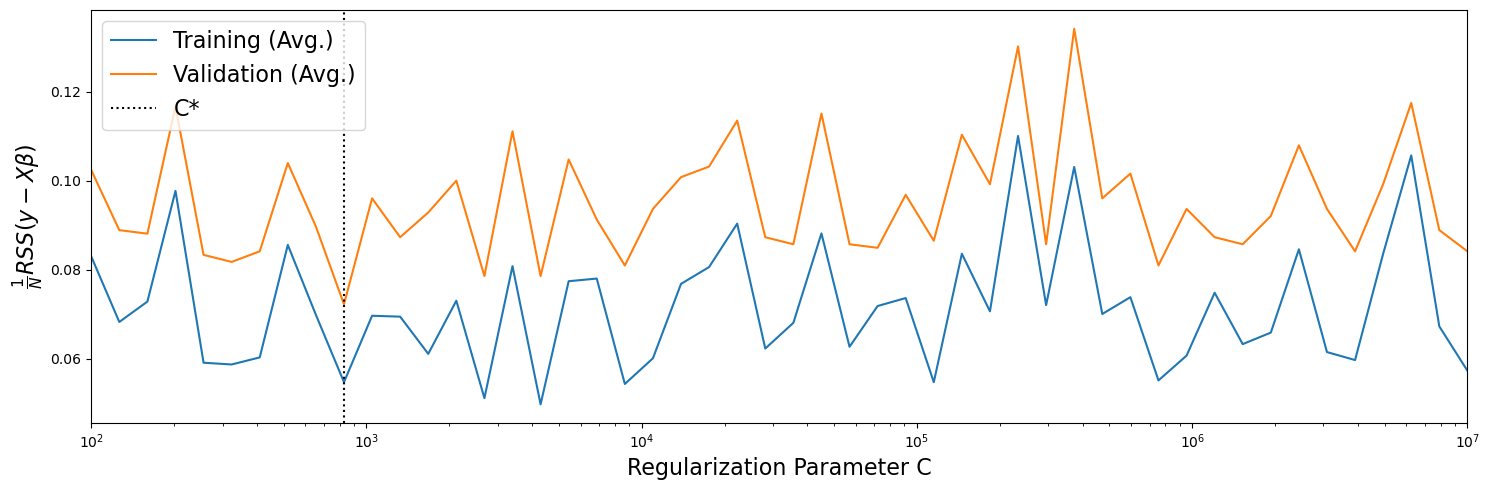

In [110]:
rand_l2(6)

The accuracy of the Logistic Regression with l2 loss, D = 12d and optimal parameter C is 0.9425925925925925
The optimal parameter C is 4291.934260128778, thus the optimal lambda is 0.0002329951810515372


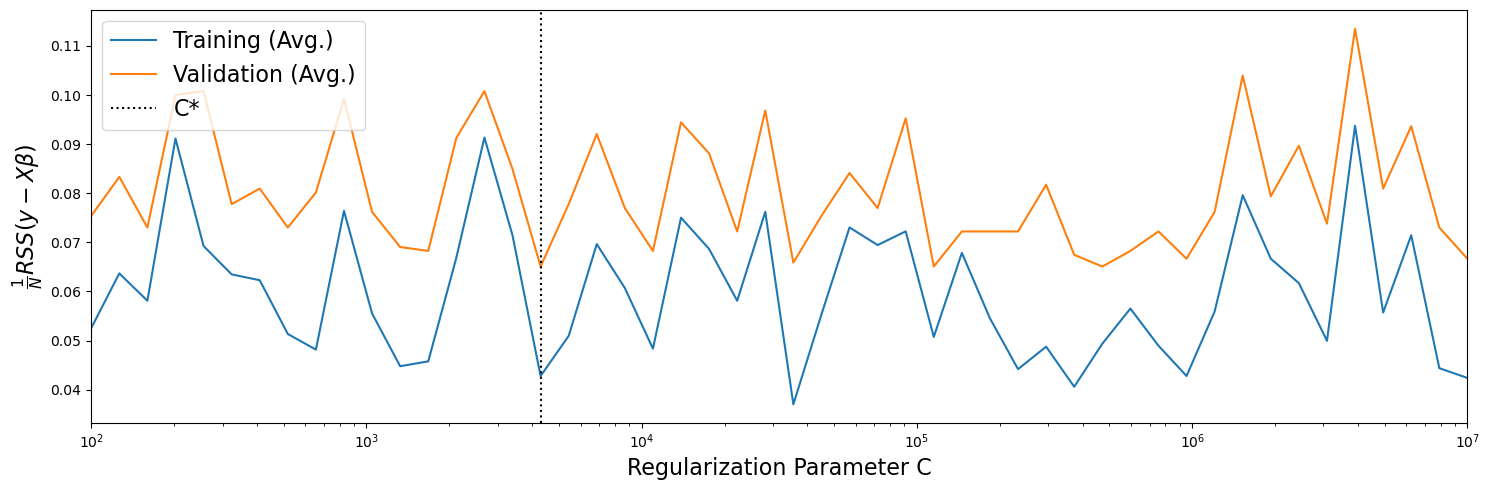

In [111]:
rand_l2(12)

The accuracy of the Logistic Regression with l2 loss, D = 24d and optimal parameter C is 0.9592592592592593
The optimal parameter C is 1048.1131341546852, thus the optimal lambda is 0.0009540954763499945


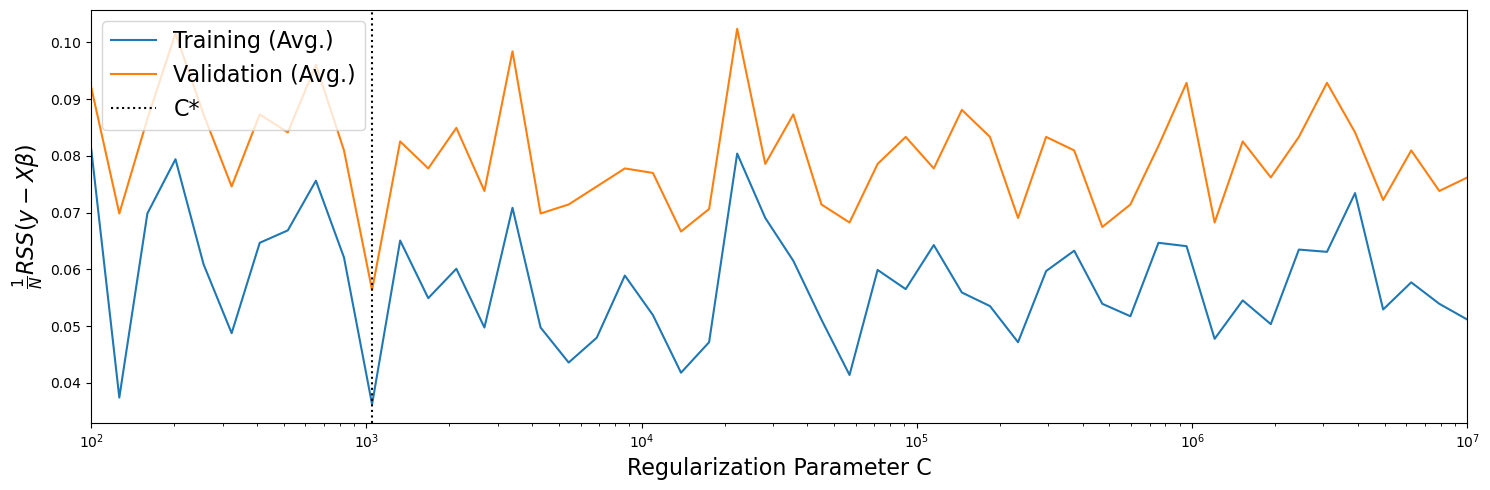

In [112]:
rand_l2(24)

The accuracy of the Logistic Regression with l2 loss, D = 48d and optimal parameter C is 0.9314814814814815
The optimal parameter C is 17575.10624854793, thus the optimal lambda is 5.6898660290182925e-05


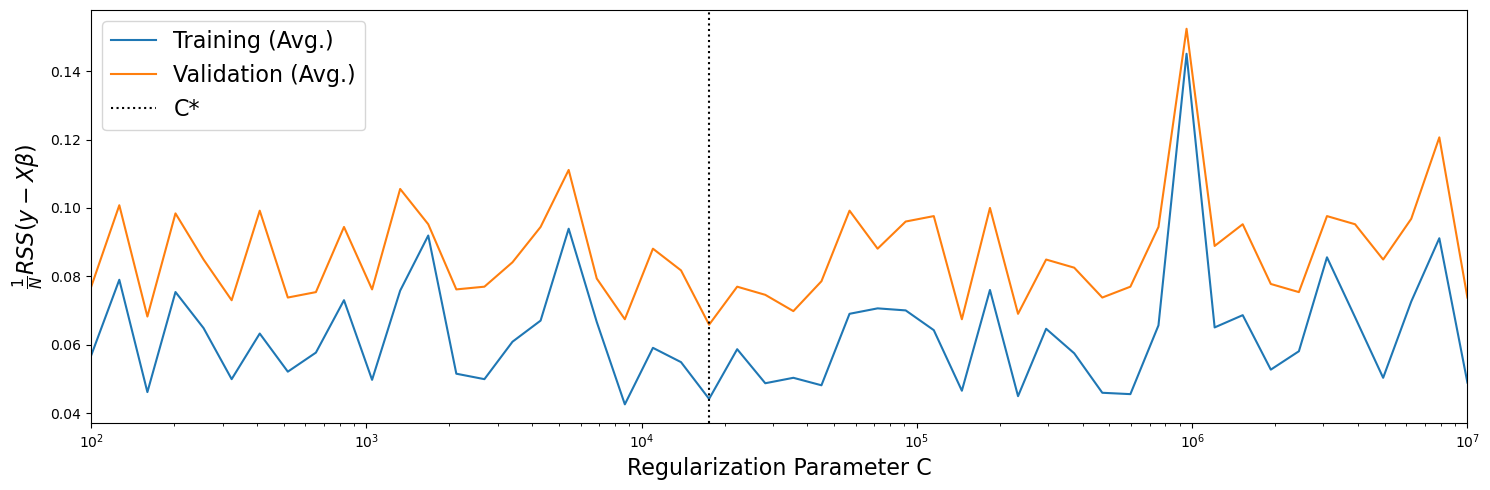

In [113]:
rand_l2(48)

The accuracy of the Logistic Regression with l2 loss, D = 96d and optimal parameter C is 0.9611111111111111
The optimal parameter C is 44984.32668969444, thus the optimal lambda is 2.2229964825261955e-05


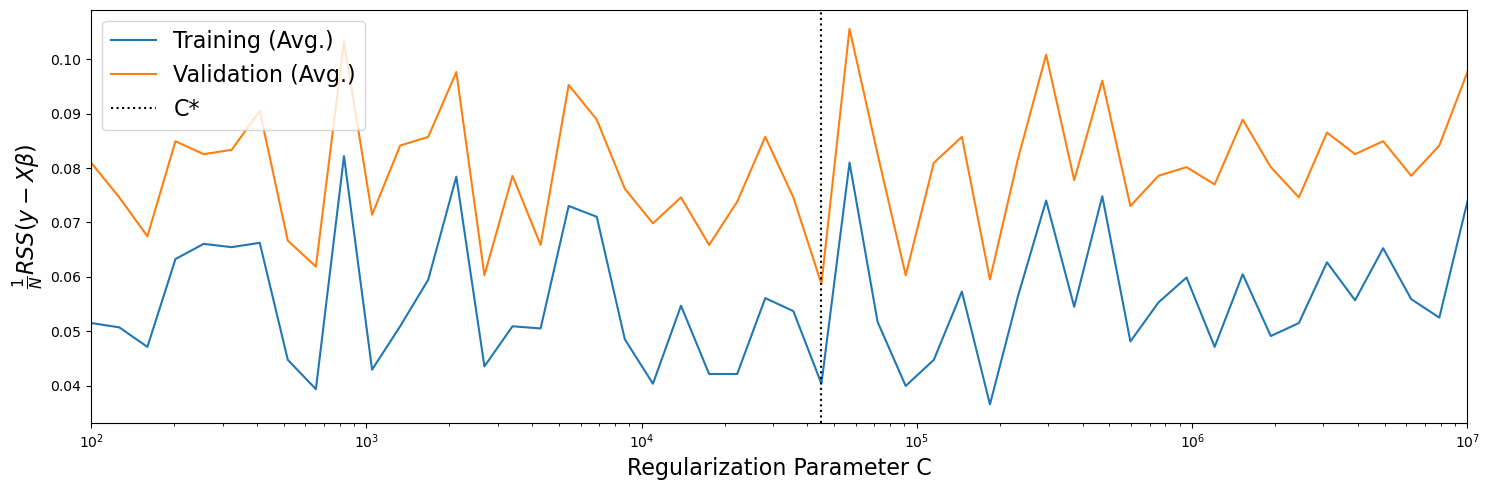

In [114]:
rand_l2(96)

It's observed that as we raise the value of D, the performance improves. Notably, starting from D=3, the achieved accuracy surpasses that of the original, untransformed data, with a remarkable accuracy of 0.95 compared to 0.9185. 

## Statistical Learning with Nearest-Neighbors

### 1) 

The expectation risk is defined as  $$R=\mathbb{E}_{X,Y}[ \left(f(X) - Y \right)^2] = \mathbb{E}_X \left[ \mathbb{E}_{Y|X}[(Y|X - f_{Bayes}(X))^2] \right]$$
Thus, we need to find the $f_{Bayes}(X)$ that minimizes $\mathbb{E}_{Y|X}[(Y|X - f_{Bayes}(X))^2]$ such that $\frac{\partial R}{\partial f_{Bayes}(X)} = 0$. 

Therefore, we have  $2 \mathbb{E}_{Y|X} \left( Y|X-f_{Bayes}(X) \right) = 0$, leading to the desired result of $f_{Bayes}(X) = \mathbb{E}_{Y|X} \left(Y | X \right)$.


### 2)

Let the Excess Risk be: $$\Delta R = Risk_{k-NN} - Risk_{Bayes} $$ $$= \mathbb{E}_{X,Y,{y_i}} \left[(f_{k-NN}(x) - Y|X)^2 - \left(f_{Bayes}(x) - Y|X \right)^2 \right]  $$ $$ =\mathbb{E}_X \left[\mathbb{E}_{Y|X,{y_i}}\left[\frac{1}{k^2} \sum_{i,j \in \mathcal{N}_R(\vec{x})} y_i y_j + (Y|X)^2 - \frac{2}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} (Y|X)y_i \right] - \sigma^2 \right] $$ with $\sigma^2(X)$ being the variance of Y(X).

$$ \Delta R = \mathbb{E}_X  \left[\frac{1}{k^2} \sum_{i \in \mathcal{N}_R(\vec{x})} \mathbb{E}_{y_i}[y_i^2] + \frac{1}{k^2} \sum_{i \neq j} \mathbb{E}[y_i] \mathbb{E}[y_j] - \frac{2}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} \mathbb{E}[Y|X] \mathbb{E}[y_i] + \mathbb{E}(Y|X)^2 - \sigma^2 \right] $$

with $y_i = Y|x_i$ , thus  $\mathbb{E}(y_i) = f_{Bayes}(x_i)$. Therefore, we get that $\mathbb{E}_{y_i} [y_i^2] = \sigma^2(x_i) + f_{Bayes}(x_i)$, $\mathbb{E}[Y|X] = f_{Bayes}(X)$ and $\mathbb{E}[(Y|X)^2] = \sigma^2 + f_{Bayes}^2(X)$. 

We can thus simplify the above equation to get

$$ \Delta R = \mathbb{E}_X \left(\frac{1}{k^2} \sum_{i \in \mathcal{N}_R(\vec{x})} \sigma^2 (x_i) \right) + \mathbb{E}_X \left[\left (\frac{1}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2 \right] $$

 If we consider the noise $\sigma^2 (x_i)$ homogeneous, $\sum \sigma^2(x_i) = k \cdot \sigma^2$
 
 Therefore, $$\Delta R = b^2 +v $$
 with $b^2 = \mathbb{E}_X \left[\left (\frac{1}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2 \right]$ and $v=\frac{\sigma^2}{k}$

### 3)

 Using the Cauchy-Schwartz equation, we have that 
 $$ b^2 \leq \frac{1}{k} \sum_i \left(f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2$$ 
 Using the information that $f_{Bayes}$ is L-Lipschitz, we obtain 
 $$ b^2 \leq \frac{1}{k} \sum_i \left(f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2 \leq \frac{L^2}{k} \sum_i ||x_i - x ||_2^2$$
 In a dimension d hyper-cube of volume 1, and since the points $x_i$ are homogeneously distributed, to find k points we need to look at a distance of $ l = \left( \frac{k}{n} \right)^{\frac{1}{d}}$, thus $\sum_i ||x_i - x ||_2^2 \leq \left( \frac{k}{n} \right)^{\frac{2}{d}}$. Combining everything we obtain the desired result :
 $$ R_{KNN} - R_{Bayes} \leq \frac{\sigma ^2}{k} + L^2 \left( \frac{k}{n} \right)^{\frac{2}{d}} $$

As we increase the quantity of data points (n), the excess risk should diminish because we have a larger dataset, and this is reflected in our formula. 

Additionally, when the number of features (d) in the data increases, the excess risk should decrease too. This is in line with our formula, which includes a function scaled by $\left( . \right)^{\frac{2}{d}}$.

Regarding the parameter k, we can't draw a definitive conclusion just by examining the equation. We need to consider the trade-off between the two terms of the upper bound. Lastly, lowering the Lipschitz constant will also reduce the excess risk. 

In summary, this dependency is logical and aligns with our expectations.

### 4)

In [105]:
def Excess_n(n, d):
    L = 1
    sig = 1
    k = np.linspace(1, 250, 250)
    var = sig * sig / k
    bias = np.zeros((len(n), len(k)))
    tradeoff = np.zeros((len(n), len(k)))
    k_opt = np.zeros(len(n))

    for i in range(len(n)):
        bias[i, :] = L * L * (k / n[i]) ** (2 / d)
        tradeoff[i, :] = var + bias[i, :]
        k_opt_idx = np.argmin(tradeoff[i, :])
        k_opt[i] = k[k_opt_idx]
        print(f'The optimal k is {k_opt[i]} for n = {n[i]} and d = {d}')

    # Creating subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plotting variance
    axs[0].plot(k, var)
    axs[0].set_ylim([0, 10])
    axs[0].set_title(f"Variance of excess risk")
    axs[0].set_xlabel("k")
    axs[0].set_ylabel("Variance")

    # Plotting bias
    axs[1].set_title(f"Bias of excess risk for various n and d = {d}")
    axs[1].set_xlabel("k")
    axs[1].set_ylabel("Bias")
    for i in range(len(n)):
        axs[1].plot(k, bias[i], label=f'n = {n[i]}')
    axs[1].legend()

    # Plotting excess risk
    axs[2].set_ylim([0, 10])
    axs[2].set_title(f"Excess risk for various n and d = {d}")
    axs[2].set_xlabel("k")
    axs[2].set_ylabel("$\\Delta R$")
    for i in range(len(n)):
        axs[2].plot(k, tradeoff[i], label=f'n = {n[i]}')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    return k_opt

The optimal k is 7.0 for n = 25 and d = 1
The optimal k is 11.0 for n = 50 and d = 1
The optimal k is 14.0 for n = 75 and d = 1
The optimal k is 17.0 for n = 100 and d = 1
The optimal k is 22.0 for n = 150 and d = 1
The optimal k is 27.0 for n = 200 and d = 1


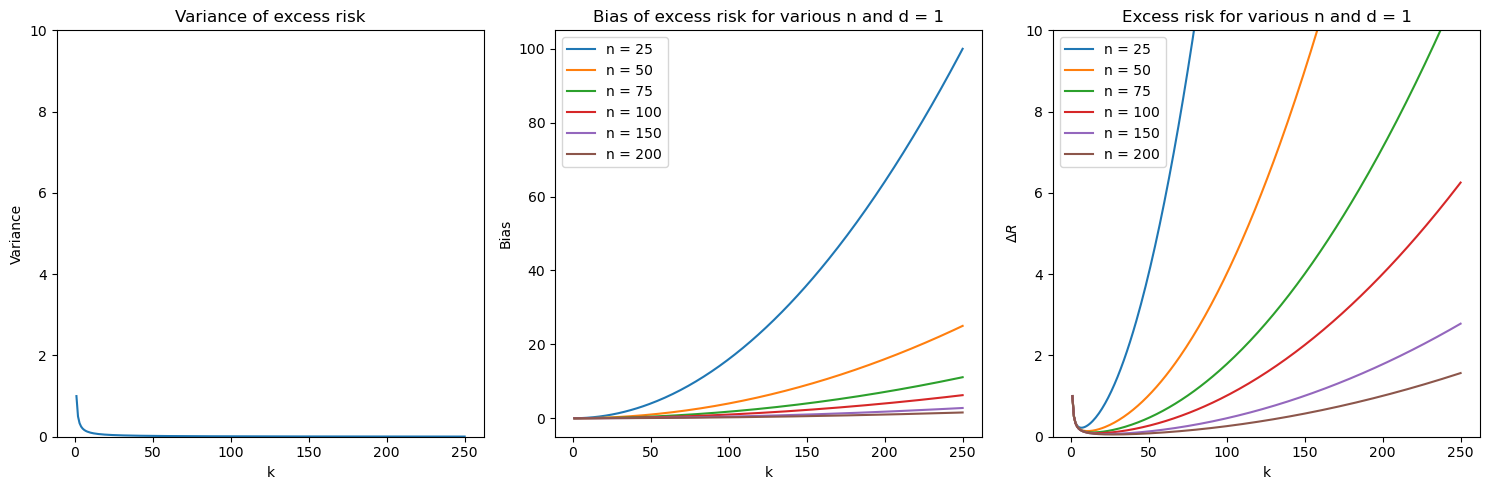

In [119]:
n = [25, 50, 75, 100, 150, 200]

best_k = Excess_n(n,1)

In [103]:
def Excess_d(n, d):
    L = 1
    sig = 1
    k = np.linspace(1, 250, 250)
    var = sig * sig / k
    bias = np.zeros((len(d), len(k)))
    tradeoff = np.zeros((len(d), len(k)))
    k_opt = np.zeros(len(d))

    for i in range(len(d)):
        bias[i, :] = L * L * (k / n) ** (2 / d[i])
        tradeoff[i, :] = var + bias[i, :]
        k_opt_idx = np.argmin(tradeoff[i, :])
        k_opt[i] = k[k_opt_idx]
        print(f'The optimal k is {k_opt[i]} for n = {n} and d = {d[i]}')

    # Creating subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plotting variance
    axs[0].plot(k, var)
    axs[0].set_ylim([0, 10])
    axs[0].set_title(f"Variance of excess risk for all n and d")
    axs[0].set_xlabel("k")
    axs[0].set_ylabel("Variance")

    # Plotting bias
    axs[1].set_title(f"Bias of excess risk for n = {n} and various d")
    axs[1].set_xlabel("k")
    axs[1].set_ylabel("Bias")
    for i in range(len(d)):
        axs[1].plot(k, bias[i], label=f'd = {d[i]}')
    axs[1].legend()

    # Plotting excess risk
    axs[2].set_ylim([0, 10])
    axs[2].set_title(f"Excess risk for n = {n} and various d")
    axs[2].set_xlabel("k")
    axs[2].set_ylabel("$\\Delta R$")
    for i in range(len(d)):
        axs[2].plot(k, tradeoff[i], label=f'd = {d[i]}')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    return k_opt


The optimal k is 22.0 for n = 150 and d = 1
The optimal k is 8.0 for n = 150 and d = 5
The optimal k is 13.0 for n = 150 and d = 20
The optimal k is 76.0 for n = 150 and d = 150
The optimal k is 249.0 for n = 150 and d = 500


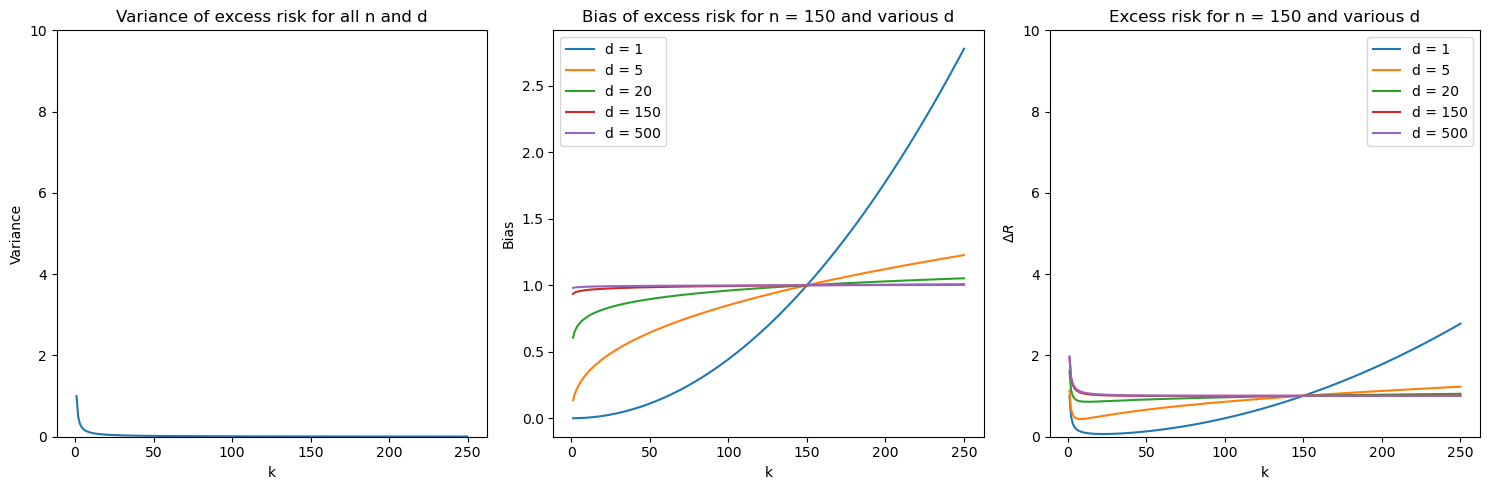

In [123]:
d = [1, 5, 20, 150, 500]

best_k = Excess_d(150,d)

When the number of data points (n) is set to 150 and the feature dimension (d) is 1, the optimal count of nearest neighbors (k) that minimizes the excess risk is found to be 22.

Exploring further, we can visualize the excess risk by varying either n or d, while keeping the other parameter constant. Graphs for various values can reveal trends: notably, increasing n leads to a decrease in excess risk, aligning with the theoretical expectations set by the earlier discussed bound formula. Similarly, elevating the feature dimension (d) results in a reduction of the excess risk, indicating a consistent pattern where higher dimensions lead to lower excess risk.

### 5)

To fin the best k, we will minimize $\Delta R$ with respect to k: 
$$ \frac{\partial ΔR}{\partial k} = - \left( \frac{σ}{k} \right)^2 + \frac{2}{d} \frac{L^2}{n^{\frac{2}{d}}} k ^{\frac{2}{d} - 1} = 0$$
$$ \implies \frac{σ^2}{k^2} = \frac{2}{d} \frac{L^2}{n^{\frac{2}{d}}} k ^{\frac{2}{d} - 1} $$

$$\implies k^{\frac{2+d}{d}} = \frac{\sigma^2}{2 L^2} d n^{\frac{2}{d}}$$

$$\implies k_* = \left(\frac{\sigma^2}{2 L^2} d n^{\frac{2}{d}} \right)^{\frac{d}{d+2}} $$

As the dimensionality \( d \) approaches infinity, the exponent $(\frac{d}{d+2})$ converges to 1. Consequently, our focus shifts to evaluating $\left(\frac{\sigma^2}{2 L^2} d n^{\frac{2}{d}} \right)$. In this scenario, with \( d \) tending to infinity, the optimal number of nearest neighbors similarly trends towards infinity. This pattern becomes apparent when we analyze the output of \( k_* \) across various values of \( d \) (as discussed in Question 4).

The relationship with \( n \) is intuitively logical: as the number of data points increases, it's natural for the count of nearest neighbors required to maintain a comparable level of excess risk to also increase. This is a direct consequence of having more data points in the dataset.

### 6)

When we We plug in the new $k_*$ into the bound,  we get:
 $$ ΔR \leq \frac{\sigma ^2}{k_*} + L^2 \left( \frac{k_*}{n} \right)^{\frac{2}{d}} = \frac{σ^2}{σ^{\frac{2d}{d+2}}} \frac{\left(2 L^2 \right)^{\frac{d}{d+2}}}{\left(d n^{\frac{2}{d}} \right)^{\frac{d}{d+2}}} + L^2 \left (\frac{\left ( \frac{σ^2}{2 L^2} d n^{\frac{2}{d}} \right)^{\frac{d}{2+d}}}{n} \right)^{\frac{2}{d}}$$

 $$ = \frac{1}{n^{\frac{2}{d+2}}} σ^{\frac{4}{d+2}} L ^{\frac{2d}{d+2}} \left ( \left(\frac{2}{d} \right)^{\frac{d}{d+2}} + \left(\frac{d}{2} \right)^{\frac{2}{d+2}} \right)$$

 Therefore, we see that when n goes to infinity, we reduce the excess risk as it goes to zero. Samewise as d goes to infinity.

### 7)

From the previous equation, we have that 

$$ n = \left(\frac{1}{ΔR} \right)^{\frac{d+2}{2}} σ^2 L^d \left(\left(\frac{2}{d} \right)^{\frac{d}{d+2}} + \left(\frac{d}{2} \right)^{\frac{2}{d+2}} \right)^{\frac{d+2}{2}}$$

C:\Users\Yass La Menace\AppData\Local\Temp\ipykernel_28292\32778943.py:10: RuntimeWarning: overflow encountered in power
  n = (1/delta_R)**((d+2)/2) * (sigma**2) * (L**d) * (((2/d)**(d/(d+2)) + (d/2)**(2/(d+2)))**((d+2)/2))
C:\Users\Yass La Menace\AppData\Local\Temp\ipykernel_28292\32778943.py:10: RuntimeWarning: overflow encountered in multiply
  n = (1/delta_R)**((d+2)/2) * (sigma**2) * (L**d) * (((2/d)**(d/(d+2)) + (d/2)**(2/(d+2)))**((d+2)/2))
c:\Users\Yass La Menace\anaconda3\envs\Coding\Lib\site-packages\matplotlib\scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)
C:\Users\Yass La Menace\AppData\Local\Temp\ipykernel_28292\32778943.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim([0, 1e265])
c:\Users\Yass La Menace\anaconda3\envs\Coding\Lib\site-packages\matplotlib\ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


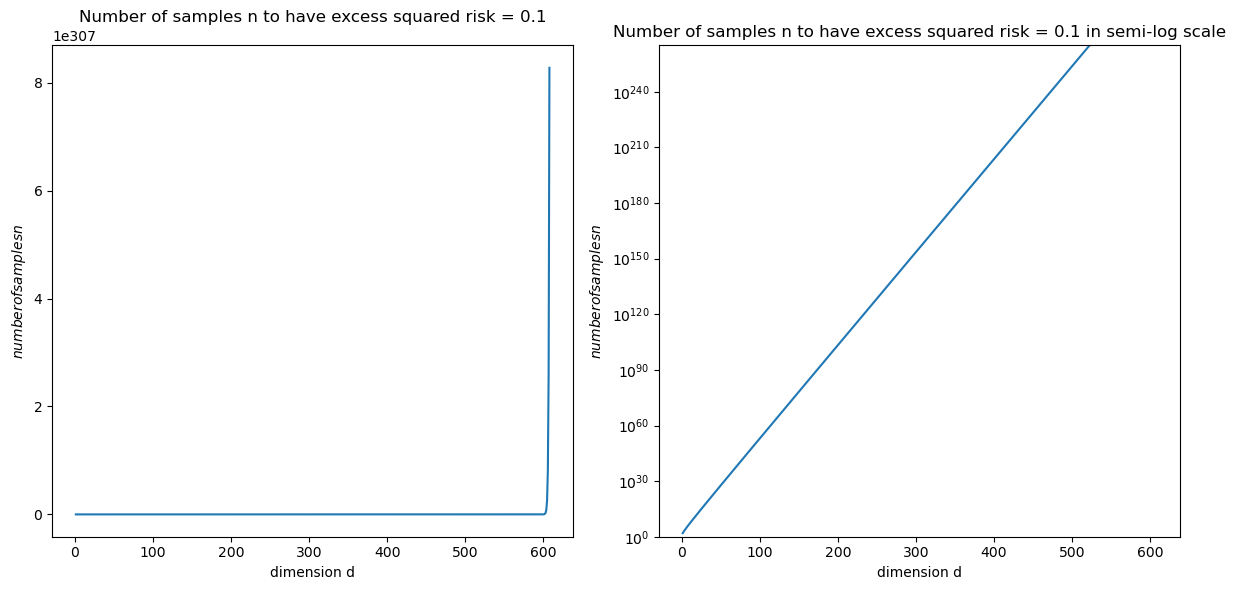

In [101]:
# Constants
delta_R = 0.1
sigma = 1
L = 1

# Dimension range
d = np.arange(1, 1000, 1)

# Calculate number of samples n for each dimension d
n = (1/delta_R)**((d+2)/2) * (sigma**2) * (L**d) * (((2/d)**(d/(d+2)) + (d/2)**(2/(d+2)))**((d+2)/2))

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting n as a function of d
axs[0].plot(d, n)
axs[0].set_title("Number of samples n to have excess squared risk = 0.1")
axs[0].set_xlabel('dimension d')
axs[0].set_ylabel('$number of samples n$')

# Plotting n as a function of d on a semilogarithmic scale
axs[1].semilogy(d, n)
axs[1].set_title("Number of samples n to have excess squared risk = 0.1 in semi-log scale")
axs[1].set_ylim([0, 1e265])
axs[1].set_xlabel('dimension d')
axs[1].set_ylabel('$number of samples n$')

plt.tight_layout()
plt.show()


Observing the relationship between the number of data points \( n \) and the dimensionality \( d \), it becomes evident that to keep a constant level of excess squared risk, \( n \) must increase at an exponential rate as \( d \) rises. This trend is a cause for concern, as it implies that even a minor increment in the dimensionality necessitates a substantially larger dataset to preserve the same level of excess squared risk.